<a href="https://colab.research.google.com/github/MithunKiniStar/AutoEncoders/blob/main/PhotoToSketch_using_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PhotoToSketch using Keras

In [1]:
import numpy as np
import tensorflow as tf
import keras 
from keras.layers import Dense, Conv2D, MaxPool2D, UpSampling2D, Dropout, Input
from keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm 
import os
import re

In [2]:
# to get the files in proper order
def sorted_alphanumeric(data):  
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)',key)]
    return sorted(data,key = alphanum_key)


# defining the size of image 
SIZE = 256

image_path = '/content/photos'
img_array = []

sketch_path = '/content/sketches'
sketch_array = []

image_file = sorted_alphanumeric(os.listdir(image_path))
sketch_file = sorted_alphanumeric(os.listdir(sketch_path))


for i in tqdm(image_file):
    image = cv2.imread(image_path + '/' + i,1)
    print("Image is ",image)
    
    # as opencv load image in bgr format converting it to rgb
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # resizing images 
    image = cv2.resize(image, (SIZE, SIZE))
    
    # normalizing image 
    image = image.astype('float32') / 255.0
    
    #appending normal normal image    
    img_array.append(img_to_array(image))
    # Image Augmentation
    
    # horizontal flip 
    img1 = cv2.flip(image,1)
    img_array.append(img_to_array(img1))
     #vertical flip 
    img2 = cv2.flip(image,-1)
    img_array.append(img_to_array(img2))
     #vertical flip 
    img3 = cv2.flip(image,-1)
    # horizontal flip
    img3 = cv2.flip(img3,1)
    img_array.append(img_to_array(img3))
    # rotate clockwise 
    img4 = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
    img_array.append(img_to_array(img4))
    # flip rotated image 
    img5 = cv2.flip(img4,1)
    img_array.append(img_to_array(img5))
     # rotate anti clockwise 
    img6 = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)
    img_array.append(img_to_array(img6))
    # flip rotated image 
    img7 = cv2.flip(img6,1)
    img_array.append(img_to_array(img7))
  
    
for i in tqdm(sketch_file):
    image = cv2.imread(sketch_path + '/' + i,1)
    
    # as opencv load image in bgr format converting it to rgb
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # resizing images 
    image = cv2.resize(image, (SIZE, SIZE))
    
    # normalizing image 
    image = image.astype('float32') / 255.0
    # appending normal sketch image
    sketch_array.append(img_to_array(image))
    
    #Image Augmentation
    # horizontal flip 
    img1 = cv2.flip(image,1)
    sketch_array.append(img_to_array(img1))
     #vertical flip 
    img2 = cv2.flip(image,-1)
    sketch_array.append(img_to_array(img2))
     #vertical flip 
    img3 = cv2.flip(image,-1)
    # horizontal flip
    img3 = cv2.flip(img3,1)
    sketch_array.append(img_to_array(img3))
    # rotate clockwise 
    img4 = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
    sketch_array.append(img_to_array(img4))
    # flip rotated image 
    img5 = cv2.flip(img4,1)
    sketch_array.append(img_to_array(img5))
     # rotate anti clockwise 
    img6 = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)
    sketch_array.append(img_to_array(img6))
    # flip rotated image 
    img7 = cv2.flip(img6,1)
    sketch_array.append(img_to_array(img7))

  4%|▎         | 7/188 [00:00<00:02, 63.82it/s]

Image is  [[[202 175 101]
  [202 175 101]
  [202 175 101]
  ...
  [199 173 106]
  [199 173 106]
  [199 173 106]]

 [[202 175 101]
  [202 175 101]
  [202 175 101]
  ...
  [199 173 106]
  [199 173 106]
  [199 173 106]]

 [[202 175 101]
  [202 175 101]
  [202 175 101]
  ...
  [199 173 106]
  [199 173 106]
  [199 173 106]]

 ...

 [[ 13  18  19]
  [ 23  28  29]
  [ 26  31  32]
  ...
  [ 27  56  83]
  [ 27  56  83]
  [ 29  58  85]]

 [[ 27  35  35]
  [ 24  32  32]
  [ 18  26  26]
  ...
  [ 29  59  86]
  [ 21  50  77]
  [ 30  59  86]]

 [[ 27  35  35]
  [ 24  32  32]
  [ 18  26  26]
  ...
  [ 28  58  85]
  [ 21  50  77]
  [ 32  61  88]]]
Image is  [[[207 180 106]
  [207 180 106]
  [207 180 106]
  ...
  [214 186 115]
  [214 187 113]
  [214 187 113]]

 [[207 180 106]
  [207 180 106]
  [207 180 106]
  ...
  [215 187 116]
  [215 188 114]
  [215 188 114]]

 [[207 180 106]
  [207 180 106]
  [207 180 106]
  ...
  [216 188 117]
  [216 189 115]
  [216 189 115]]

 ...

 [[ 90 222 246]
  [ 88 224 250]


 12%|█▏        | 23/188 [00:00<00:02, 70.53it/s]

Image is  [[[156 123  43]
  [157 124  44]
  [157 124  44]
  ...
  [159 128  53]
  [159 128  53]
  [159 128  53]]

 [[157 124  44]
  [158 125  45]
  [158 125  45]
  ...
  [159 128  53]
  [159 128  53]
  [159 128  53]]

 [[159 126  46]
  [159 126  46]
  [159 126  46]
  ...
  [159 128  53]
  [159 128  53]
  [159 128  53]]

 ...

 [[171 135  59]
  [168 133  59]
  [165 133  62]
  ...
  [105 102  97]
  [111 106  97]
  [113 109  98]]

 [[177 138  64]
  [171 133  61]
  [164 131  62]
  ...
  [ 89  97 104]
  [ 99 104 107]
  [101 106 107]]

 [[176 137  63]
  [171 133  61]
  [164 130  64]
  ...
  [ 79  90 104]
  [ 88  98 108]
  [ 92 101 110]]]
Image is  [[[255 221 114]
  [255 221 114]
  [255 220 116]
  ...
  [255 217 125]
  [255 217 125]
  [255 217 125]]

 [[255 221 114]
  [255 221 114]
  [255 220 116]
  ...
  [255 217 125]
  [255 217 125]
  [255 217 125]]

 [[255 221 114]
  [255 221 114]
  [255 220 116]
  ...
  [255 217 125]
  [255 217 125]
  [255 217 125]]

 ...

 [[206 164  97]
  [195 157  93]


 21%|██        | 39/188 [00:00<00:02, 70.66it/s]

Image is  [[[248 218 129]
  [248 218 129]
  [248 218 131]
  ...
  [240 213 139]
  [240 213 139]
  [240 213 139]]

 [[248 218 129]
  [248 218 129]
  [248 218 131]
  ...
  [240 213 139]
  [240 213 139]
  [240 213 139]]

 [[248 218 129]
  [248 218 129]
  [248 218 131]
  ...
  [240 213 139]
  [240 213 139]
  [240 213 139]]

 ...

 [[208 174  84]
  [206 174  85]
  [204 173  88]
  ...
  [211 184 103]
  [212 185 104]
  [213 186 105]]

 [[209 178  93]
  [195 165  82]
  [195 165  88]
  ...
  [200 174  90]
  [199 173  89]
  [198 172  88]]

 [[210 180  97]
  [204 175  94]
  [207 178 104]
  ...
  [202 176  92]
  [201 175  91]
  [200 174  90]]]
Image is  [[[  0   0  10]
  [  0   0  10]
  [  0   0   9]
  ...
  [247 216 141]
  [247 216 141]
  [247 216 141]]

 [[  0   0   3]
  [  0   0   3]
  [  0   0   3]
  ...
  [247 216 141]
  [247 216 141]
  [247 216 141]]

 [[ 10   7   2]
  [  9   6   1]
  [  8   5   0]
  ...
  [247 216 141]
  [247 216 141]
  [247 216 141]]

 ...

 [[214 185 100]
  [214 185 100]


 29%|██▉       | 55/188 [00:00<00:01, 73.37it/s]

Image is  [[[218 189 104]
  [218 189 104]
  [218 189 104]
  ...
  [217 190 116]
  [217 190 116]
  [217 190 116]]

 [[218 189 104]
  [218 189 104]
  [218 189 104]
  ...
  [218 191 117]
  [217 190 116]
  [217 190 116]]

 [[219 190 105]
  [219 190 105]
  [219 190 105]
  ...
  [218 191 117]
  [218 191 117]
  [217 190 116]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [  4   3   0]
  [  8   4   3]
  [  3   2   0]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [  4   1   0]
  [  5   0   0]
  [  4   1   0]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [  5   1   0]
  [  5   1   0]
  [  5   1   0]]]
Image is  [[[ 5  1  0]
  [ 5  1  0]
  [ 5  1  0]
  ...
  [ 0  0  9]
  [ 0  0  9]
  [ 0  0  9]]

 [[11  3  0]
  [ 9  4  0]
  [11  3  0]
  ...
  [ 0  0  3]
  [ 0  0  4]
  [ 0  0  3]]

 [[19  8  0]
  [18  9  0]
  [20  9  0]
  ...
  [ 7  6  0]
  [ 8  5  0]
  [ 8  7  0]]

 ...

 [[22 34 40]
  [23 34 42]
  [30 42 52]
  ...
  [10 12 12]
  [10 12 12]
  [14 16 16]]



 39%|███▉      | 73/188 [00:00<00:01, 79.59it/s]

Image is  [[[  2   3   0]
  [  2   3   0]
  [  2   3   0]
  ...
  [ 13   0   4]
  [ 13   0   4]
  [ 13   0   4]]

 [[  0   2   0]
  [  0   2   0]
  [  0   2   0]
  ...
  [ 17   4   0]
  [ 17   4   0]
  [ 17   4   0]]

 [[  0   0   3]
  [  0   0   3]
  [  0   0   3]
  ...
  [234 225 168]
  [234 225 168]
  [234 225 168]]

 ...

 [[238 209 134]
  [238 209 134]
  [238 209 134]
  ...
  [235 211 139]
  [235 211 139]
  [235 211 139]]

 [[237 208 133]
  [237 208 133]
  [238 209 134]
  ...
  [237 213 141]
  [236 212 140]
  [235 211 139]]

 [[237 208 133]
  [237 208 133]
  [238 209 134]
  ...
  [237 213 141]
  [236 212 140]
  [235 211 139]]]
Image is  [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 ...

 [[131 160 169]
  [123 154 163]


 48%|████▊     | 90/188 [00:01<00:01, 79.38it/s]

Image is  [[[203 176  90]
  [203 176  90]
  [203 176  90]
  ...
  [197 173  91]
  [196 172  90]
  [195 171  89]]

 [[203 176  90]
  [203 176  90]
  [204 177  91]
  ...
  [197 173  91]
  [196 172  90]
  [195 171  89]]

 [[203 176  90]
  [204 177  91]
  [204 177  91]
  ...
  [198 174  92]
  [197 173  91]
  [196 172  90]]

 ...

 [[ 10   2   3]
  [  8   0   1]
  [  7   0   0]
  ...
  [203 180 105]
  [203 180 105]
  [204 181 106]]

 [[  5   0   0]
  [  5   0   0]
  [  5   0   0]
  ...
  [205 182 107]
  [205 182 107]
  [205 182 107]]

 [[  5   0   0]
  [  5   0   0]
  [  5   0   0]
  ...
  [205 182 107]
  [205 182 107]
  [205 182 107]]]
Image is  [[[207 177  90]
  [207 177  90]
  [207 177  90]
  ...
  [  2   0   3]
  [  2   0   3]
  [  2   0   3]]

 [[207 177  90]
  [207 177  90]
  [207 177  90]
  ...
  [  2   0   1]
  [  2   0   1]
  [  2   0   1]]

 [[208 178  91]
  [208 178  91]
  [208 178  91]
  ...
  [  4   0   0]
  [  4   0   0]
  [  4   0   0]]

 ...

 [[139 118 116]
  [135 114 112]


 57%|█████▋    | 108/188 [00:01<00:00, 83.45it/s]

Image is  [[[232 210 122]
  [233 211 123]
  [233 211 123]
  ...
  [236 216 131]
  [236 216 131]
  [235 215 130]]

 [[234 212 124]
  [234 212 124]
  [234 212 124]
  ...
  [237 217 132]
  [237 217 132]
  [236 216 131]]

 [[235 213 125]
  [235 213 125]
  [235 213 125]
  ...
  [238 218 133]
  [238 218 133]
  [238 218 133]]

 ...

 [[220 250 251]
  [224 254 255]
  [227 255 255]
  ...
  [228 249 247]
  [230 251 249]
  [235 255 254]]

 [[226 254 255]
  [226 254 255]
  [225 253 254]
  ...
  [231 252 250]
  [235 253 252]
  [237 255 254]]

 [[226 254 255]
  [226 254 255]
  [225 253 254]
  ...
  [231 252 250]
  [235 253 252]
  [237 255 254]]]
Image is  [[[255 213 112]
  [255 213 112]
  [255 213 112]
  ...
  [255 216 117]
  [255 216 117]
  [255 217 118]]

 [[255 213 112]
  [255 213 112]
  [255 213 112]
  ...
  [255 217 118]
  [255 216 117]
  [255 216 117]]

 [[254 214 112]
  [254 214 112]
  [254 214 112]
  ...
  [255 217 118]
  [255 216 117]
  [254 215 116]]

 ...

 [[244 185  85]
  [244 185  85]


 67%|██████▋   | 126/188 [00:01<00:00, 83.77it/s]

Image is  [[[224 189  91]
  [224 189  91]
  [224 189  91]
  ...
  [  0   2   0]
  [  0   2   0]
  [  0   2   0]]

 [[224 189  91]
  [224 189  91]
  [224 189  91]
  ...
  [  0   2   2]
  [  0   2   3]
  [  0   2   2]]

 [[225 190  92]
  [225 190  92]
  [225 190  92]
  ...
  [ 11   0   4]
  [ 11   0   6]
  [ 11   0   4]]

 ...

 [[202 220 227]
  [205 223 230]
  [198 217 225]
  ...
  [215 197 132]
  [221 201 130]
  [225 203 131]]

 [[194 216 214]
  [196 218 216]
  [193 214 215]
  ...
  [212 201 144]
  [213 198 136]
  [214 196 131]]

 [[202 225 220]
  [205 228 223]
  [204 227 223]
  ...
  [218 210 157]
  [218 206 148]
  [219 204 142]]]
Image is  [[[227 194  97]
  [227 194  97]
  [226 193  96]
  ...
  [223 189  99]
  [222 188  98]
  [220 186  96]]

 [[229 196  99]
  [228 195  98]
  [228 195  98]
  ...
  [225 191 101]
  [224 190 100]
  [222 188  98]]

 [[230 197 100]
  [230 197 100]
  [230 197 100]
  ...
  [227 193 103]
  [226 192 102]
  [224 190 100]]

 ...

 [[201 176 106]
  [197 174 106]


 77%|███████▋  | 144/188 [00:01<00:00, 78.94it/s]

Image is  [[[  0   2   1]
  [  0   2   1]
  [  0   2   1]
  ...
  [  0   1   0]
  [  0   1   0]
  [  0   1   0]]

 [[  0   1   0]
  [  0   1   0]
  [  0   1   0]
  ...
  [  0   1   0]
  [  0   0   1]
  [  0   1   0]]

 [[  0   2   3]
  [  0   2   3]
  [  0   2   3]
  ...
  [  0   2   3]
  [  0   1   5]
  [  0   2   3]]

 ...

 [[225 195 106]
  [226 196 107]
  [227 197 108]
  ...
  [234 207 120]
  [234 207 120]
  [234 207 120]]

 [[223 193 104]
  [224 194 105]
  [225 195 106]
  ...
  [232 205 118]
  [232 205 118]
  [232 205 118]]

 [[223 193 104]
  [224 194 105]
  [225 195 106]
  ...
  [232 205 118]
  [232 205 118]
  [232 205 118]]]
Image is  [[[243 214 129]
  [243 214 129]
  [243 214 129]
  ...
  [243 214 139]
  [243 214 139]
  [243 214 139]]

 [[243 214 129]
  [243 214 129]
  [243 214 129]
  ...
  [243 214 139]
  [243 214 139]
  [243 214 139]]

 [[243 214 129]
  [243 214 129]
  [243 214 129]
  ...
  [243 214 139]
  [243 214 139]
  [243 214 139]]

 ...

 [[  0   0   9]
  [  0   0  10]


 81%|████████  | 152/188 [00:01<00:00, 74.48it/s]

Image is  [[[  2   0   1]
  [  2   0   1]
  [  3   0   2]
  ...
  [  5   0   0]
  [  5   0   0]
  [  5   0   0]]

 [[  4   1   3]
  [  4   1   3]
  [  3   0   2]
  ...
  [  4   0   0]
  [  4   0   0]
  [  4   0   0]]

 [[  2   0   3]
  [  2   0   3]
  [  2   0   3]
  ...
  [  2   0   0]
  [  2   0   0]
  [  2   0   0]]

 ...

 [[212 176  98]
  [212 176  98]
  [209 176  96]
  ...
  [224 198 114]
  [224 197 116]
  [224 197 116]]

 [[210 175  95]
  [210 175  95]
  [210 175  95]
  ...
  [223 197 113]
  [223 196 115]
  [224 197 116]]

 [[210 175  95]
  [210 175  95]
  [210 175  95]
  ...
  [223 197 113]
  [223 196 115]
  [224 197 116]]]
Image is  [[[  9   0   6]
  [  9   0   6]
  [  9   0   6]
  ...
  [  2   0   4]
  [  2   0   4]
  [  2   0   4]]

 [[  5   0   2]
  [  5   0   2]
  [  5   0   2]
  ...
  [  2   0   3]
  [  2   0   4]
  [  2   0   3]]

 [[  0   5   0]
  [  0   5   0]
  [  0   5   0]
  ...
  [  2   1   3]
  [  2   1   5]
  [  2   1   3]]

 ...

 [[254 254 254]
  [254 254 254]


 89%|████████▉ | 168/188 [00:02<00:00, 72.68it/s]

Image is  [[[252 219 139]
  [252 219 139]
  [252 219 139]
  ...
  [238 209 134]
  [238 209 134]
  [238 209 134]]

 [[252 219 139]
  [252 219 139]
  [252 219 139]
  ...
  [238 209 134]
  [238 209 134]
  [238 209 134]]

 [[252 219 139]
  [252 219 139]
  [252 219 139]
  ...
  [238 209 134]
  [238 209 134]
  [238 209 134]]

 ...

 [[255 255 236]
  [255 255 237]
  [255 255 239]
  ...
  [221 196 124]
  [221 196 124]
  [222 197 125]]

 [[255 255 248]
  [255 255 248]
  [255 255 248]
  ...
  [220 195 123]
  [222 197 125]
  [224 199 127]]

 [[254 255 253]
  [254 255 253]
  [254 255 253]
  ...
  [220 195 123]
  [222 197 125]
  [224 199 127]]]
Image is  [[[243 215 131]
  [243 215 131]
  [243 215 131]
  ...
  [248 219 144]
  [248 219 144]
  [247 218 143]]

 [[243 215 131]
  [243 215 131]
  [244 216 132]
  ...
  [248 219 144]
  [248 219 144]
  [247 218 143]]

 [[243 215 131]
  [244 216 132]
  [244 216 132]
  ...
  [249 220 145]
  [248 219 144]
  [248 219 144]]

 ...

 [[230 201 126]
  [231 202 127]


100%|██████████| 188/188 [00:02<00:00, 75.72it/s]


[[[241 210 125]
  [241 210 125]
  [241 210 125]
  ...
  [243 214 133]
  [243 214 133]
  [243 214 133]]

 [[241 210 125]
  [241 210 125]
  [242 211 126]
  ...
  [243 214 133]
  [243 214 133]
  [243 214 133]]

 [[241 210 125]
  [242 211 126]
  [242 211 126]
  ...
  [243 214 133]
  [243 214 133]
  [243 214 133]]

 ...

 [[228 198 119]
  [228 198 119]
  [228 198 119]
  ...
  [230 203 123]
  [231 204 124]
  [232 205 125]]

 [[225 195 116]
  [226 196 117]
  [228 198 119]
  ...
  [233 205 128]
  [232 204 127]
  [231 203 126]]

 [[225 195 116]
  [226 196 117]
  [228 198 119]
  ...
  [233 205 128]
  [232 204 127]
  [231 203 126]]]
Image is  [[[243 215 131]
  [243 215 131]
  [243 215 131]
  ...
  [235 209 133]
  [235 209 133]
  [235 209 133]]

 [[243 215 131]
  [243 215 131]
  [243 215 131]
  ...
  [235 209 133]
  [235 209 133]
  [235 209 133]]

 [[243 215 131]
  [243 215 131]
  [243 215 131]
  ...
  [236 210 134]
  [236 210 134]
  [236 210 134]]

 ...

 [[249 235 199]
  [248 234 198]
  [245 230

100%|██████████| 188/188 [00:02<00:00, 87.77it/s]


In [4]:
print("Total number of sketch images:",len(sketch_array))
print("Total number of images:",len(img_array))

Total number of sketch images: 1504
Total number of images: 1504


In [47]:
# defining function to plot images pair
def plot_images(image, sketches):
    plt.figure(figsize=(7,7))
    plt.subplot(1,2,1)
    plt.title('Image', color = 'green', fontsize = 20)
    plt.imshow(image)
    plt.subplot(1,2,2)
    plt.title('Sketches ', color = 'black', fontsize = 20)
    plt.imshow(sketches)
   
    plt.show()

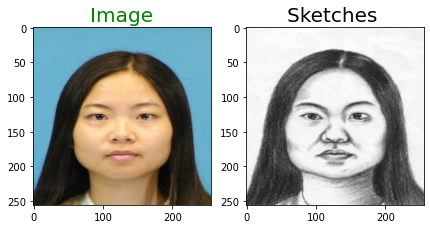

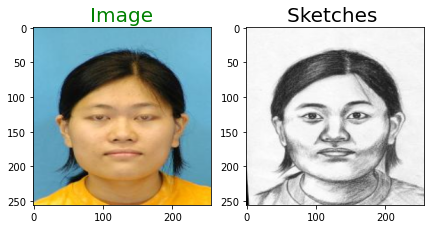

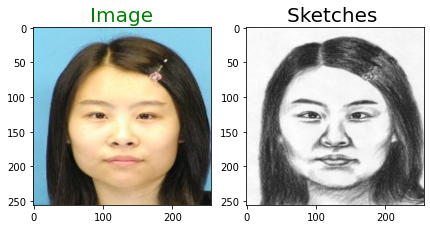

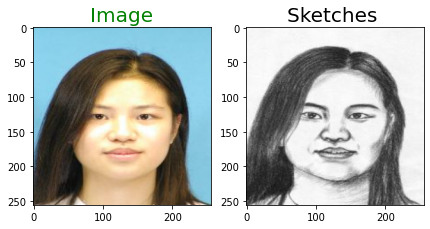

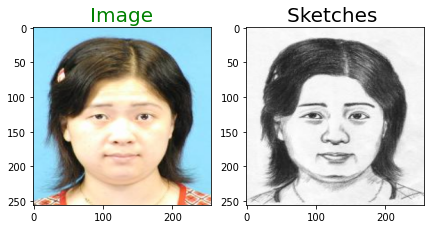

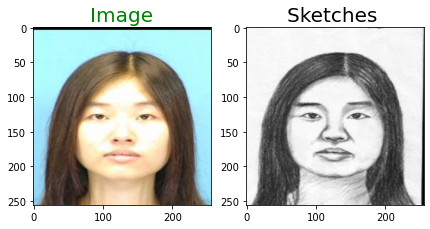

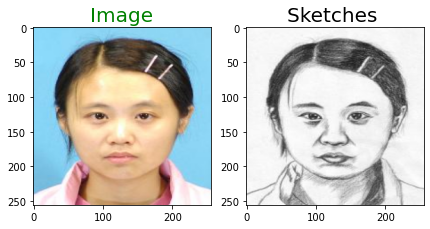

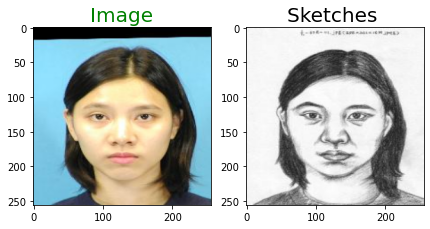

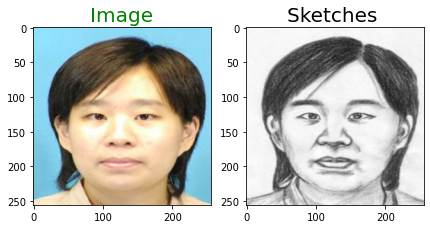

In [48]:
ls = [i for i in range(0,65,8)]
for i in ls:
    plot_images(img_array[i],sketch_array[i])

In [3]:
train_sketch_image = sketch_array[:1400]
train_image = img_array[:1400]
test_sketch_image = sketch_array[1400:]
test_image = img_array[1400:]
# reshaping
train_sketch_image = np.reshape(train_sketch_image,(len(train_sketch_image),SIZE,SIZE,3))
train_image = np.reshape(train_image, (len(train_image),SIZE,SIZE,3))
print('Train color image shape:',train_image.shape)
test_sketch_image = np.reshape(test_sketch_image,(len(test_sketch_image),SIZE,SIZE,3))
test_image = np.reshape(test_image, (len(test_image),SIZE,SIZE,3))
print('Test color image shape',test_image.shape)

Train color image shape: (1400, 256, 256, 3)
Test color image shape (104, 256, 256, 3)


In [50]:
train_image[0].shape
test_image[0].shape

(256, 256, 3)

**Deep Convolutional autoencoder**

In [52]:
import keras
from keras import layers

input_img = keras.Input(shape=(256, 256, 3))


x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
#decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
x = tf.keras.layers.Conv2DTranspose(8,(3,3), padding = 'valid')(x)
decoder_output = tf.keras.layers.Conv2DTranspose(3,(3,3), padding = 'valid')(x)


autoencoder = keras.Model(input_img, decoder_output)
#autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), loss = 'mean_absolute_error',
              metrics = ['acc'])
decoder_output.shape

TensorShape([None, 256, 256, 3])

In [55]:
# Training
from keras.callbacks import TensorBoard
# Train the autoencoder model
train_image.shape
#hist=autoencoder.fit(train_image, train_sketch_image, epochs = 5, verbose = 0)

hist=autoencoder.fit(train_image, train_sketch_image,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(test_image, test_sketch_image))



plt.plot(hist.history["loss"]);
plt.xlabel('Epochs');
plt.ylabel('Training Error');

Epoch 1/100
11/11 [==============================] - 167s 15s/step - loss: 0.1075 - acc: 0.4429 - val_loss: 0.1039 - val_acc: 0.4342
Epoch 2/100
11/11 [==============================] - 158s 14s/step - loss: 0.1063 - acc: 0.4344 - val_loss: 0.1044 - val_acc: 0.4190
Epoch 3/100
11/11 [==============================] - 158s 14s/step - loss: 0.1063 - acc: 0.4264 - val_loss: 0.1033 - val_acc: 0.4374
Epoch 4/100
11/11 [==============================] - 157s 14s/step - loss: 0.1047 - acc: 0.4265 - val_loss: 0.1019 - val_acc: 0.4203
Epoch 5/100
11/11 [==============================] - 157s 14s/step - loss: 0.1031 - acc: 0.4227 - val_loss: 0.1035 - val_acc: 0.3971
Epoch 6/100
11/11 [==============================] - 162s 15s/step - loss: 0.1022 - acc: 0.4139 - val_loss: 0.1001 - val_acc: 0.4179
Epoch 7/100
11/11 [==============================] - 160s 15s/step - loss: 0.1013 - acc: 0.4234 - val_loss: 0.0999 - val_acc: 0.4034
Epoch 8/100
11/11 [==============================] - 160s 15s/step - 

KeyboardInterrupt: ignored

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

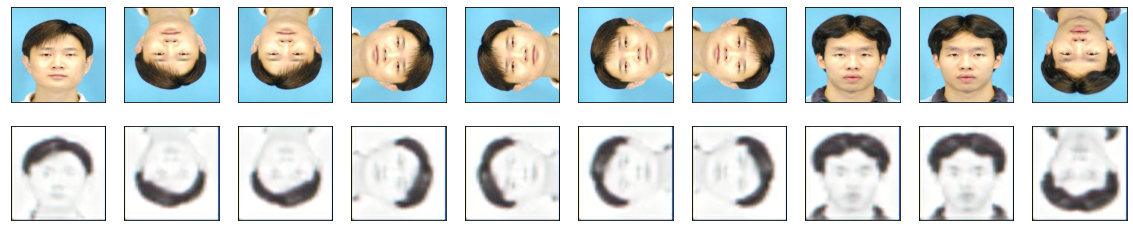

In [54]:
decoded_imgs = autoencoder.predict(test_image)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(test_image[i].reshape(256, 256, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(256, 256, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

**Deep Autoencoder**

In [4]:
from keras import layers
input_img = keras.Input(shape=(256, 256, 3))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(3, activation='sigmoid')(decoded)

Epoch 1/5
44/44 [==============================] - 468s 11s/step - loss: 0.0840 - acc: 0.6959 - val_loss: 0.0833 - val_acc: 0.9197
Epoch 2/5
44/44 [==============================] - 474s 11s/step - loss: 0.0833 - acc: 0.7236 - val_loss: 0.0826 - val_acc: 0.2032
Epoch 3/5
44/44 [==============================] - 468s 11s/step - loss: 0.0824 - acc: 0.6194 - val_loss: 0.0824 - val_acc: 0.8663
Epoch 4/5
44/44 [==============================] - 470s 11s/step - loss: 0.0820 - acc: 0.8359 - val_loss: 0.0828 - val_acc: 0.8145
Epoch 5/5
44/44 [==============================] - 467s 11s/step - loss: 0.0817 - acc: 0.8485 - val_loss: 0.0818 - val_acc: 0.8969


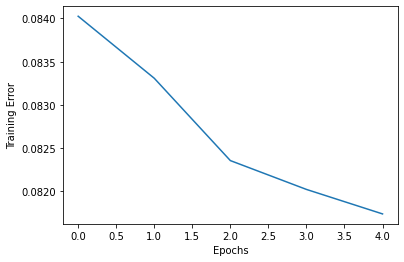

In [6]:
autoencoder = keras.Model(input_img, decoded)
#autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), loss = 'mean_absolute_error',
              metrics = ['acc'])

hist = autoencoder.fit(train_image, train_sketch_image,
                epochs=5,
                shuffle=True,
                validation_data=(test_image, test_sketch_image))


plt.plot(hist.history["loss"]);
plt.xlabel('Epochs');
plt.ylabel('Training Error');

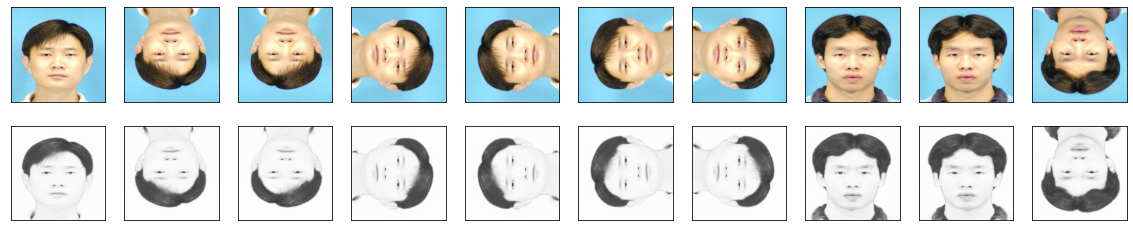

In [7]:
decoded_imgs = autoencoder.predict(test_image)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(test_image[i].reshape(256, 256, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(256, 256, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()